# Feature Selection & Ranking


In [16]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import os as os

In [17]:
import pickle

with open('data.clean.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    Data = pickle.load(f)

In [18]:

with open('data.target.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    target = pickle.load(f)
    

In [19]:

with open('data.ohcolumns.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    colList = pickle.load(f)
    

In [31]:
with open( 'data.corr.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    correlationMatrixData = pickle.load(f)
   

In [24]:
print(Data.shape)
print(target.shape)
print(colList)

(25194, 339)
(25194,)
Index(['introelapse', 'testelapse', 'surveyelapse', 'age', 'familysize',
       'screenArea', 'Q1_0', 'Q1_1', 'Q1_2', 'Q1_3',
       ...
       'race_hispanic_1', 'race_nativeam_0', 'race_nativeam_1',
       'race_nativeau_0', 'race_nativeau_1', 'race_other_0', 'race_other_1',
       'ASD_0', 'ASD_1', 'ASD_2'],
      dtype='object', length=339)


In [25]:
from sklearn.ensemble import RandomForestClassifier

num_features = 50
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target.ravel())
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = colList[fs_indices_rfi].values
best_features_rfi

array(['testelapse', 'surveyelapse', 'introelapse', 'age', 'screenArea',
       'familysize', 'Q6_5', 'Q1_5', 'Q2_5', 'Q15_5', 'Q4_5', 'Q14_5',
       'Q26_5', 'Q11_5', 'Q19_5', 'Q23_5', 'Q5_5', 'Q9_5', 'Q8_5',
       'Q24_5', 'Q18_5', 'Q7_5', 'Q15_1', 'Q3_5', 'Q12_5', 'Q17_5',
       'Q20_5', 'TIPI10_1', 'Q13_5', 'Q22_1', 'urban_2', 'education_2',
       'Q6_4', 'Q11_1', 'TIPI5_6', 'orientation_1', 'Q10_5', 'Q1_4',
       'urban_3', 'TIPI5_7', 'Q6_3', 'Q21_5', 'Q16_5', 'TIPI2_5', 'Q21_1',
       'Q20_3', 'gender_2', 'voted_2', 'TIPI10_2', 'religion_2'],
      dtype=object)

In [26]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.0222977 , 0.02216278, 0.02038316, 0.01909808, 0.01687344,
       0.01162538, 0.00996307, 0.0088217 , 0.00874783, 0.00763756,
       0.00691504, 0.0063199 , 0.00604915, 0.00578374, 0.00560383,
       0.00543677, 0.00541818, 0.00539797, 0.00532065, 0.0052304 ,
       0.00523029, 0.00522825, 0.00522618, 0.00521217, 0.00520506,
       0.0049259 , 0.00487166, 0.00481615, 0.00478716, 0.00470575,
       0.00466418, 0.0046397 , 0.00460123, 0.00457463, 0.00448753,
       0.00445501, 0.00440326, 0.00439695, 0.00436693, 0.00436217,
       0.00434404, 0.00432831, 0.00432642, 0.00429356, 0.00423972,
       0.00423626, 0.00422881, 0.00420582, 0.00419688, 0.00418717])

In [29]:
import altair as alt
alt.renderers.enable('notebook')

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

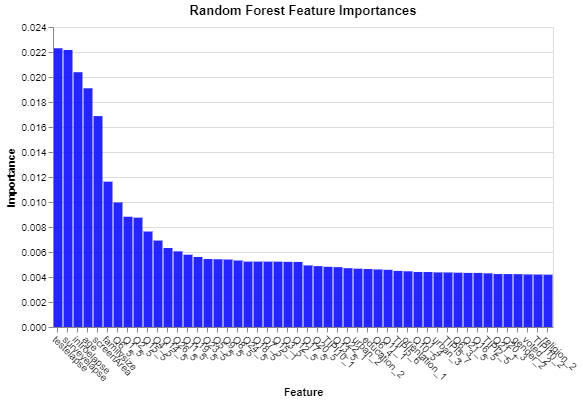

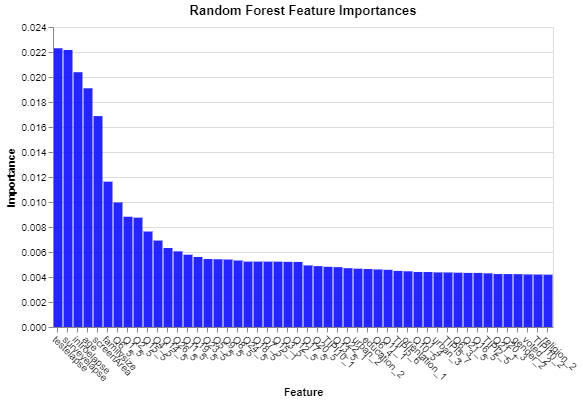

In [30]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

In [32]:
correlationMatrixData.shape

(339, 339)

In [38]:
correlationMatrixData[0,0]

0.9999999999999999

In [42]:
colList.values[1]

'testelapse'

In [48]:
for i in range(339):
    for j in range(i,339):
        if (i != j) & (correlationMatrixData[i,j] > 0.70) :#& (correlationMatrixData[i,j] < 0.68):
            print(colList.values[i],colList.values[j],correlationMatrixData[i,j])

TIPI1_0 TIPI2_0 0.8181296392909801
TIPI1_0 TIPI3_0 0.7206097286832275
TIPI1_0 TIPI4_0 0.7668015729714385
TIPI1_0 TIPI5_0 0.7300726599000648
TIPI1_0 TIPI6_0 0.7447273754837219
TIPI1_0 TIPI7_0 0.774549066722302
TIPI1_0 TIPI8_0 0.7866203669237748
TIPI1_0 TIPI9_0 0.7825345351520792
TIPI1_0 TIPI10_0 0.7104288771611579
TIPI2_0 TIPI3_0 0.7396710775896695
TIPI2_0 TIPI4_0 0.799743464493879
TIPI2_0 TIPI5_0 0.7741685018965317
TIPI2_0 TIPI6_0 0.79288508968464
TIPI2_0 TIPI7_0 0.8078267504255526
TIPI2_0 TIPI8_0 0.8204211877570206
TIPI2_0 TIPI9_0 0.8056459508932853
TIPI2_0 TIPI10_0 0.7190226043672987
TIPI3_0 TIPI4_0 0.7588018840631329
TIPI3_0 TIPI5_0 0.7262727161839585
TIPI3_0 TIPI6_0 0.7451046737831571
TIPI3_0 TIPI7_0 0.784839381116799
TIPI3_0 TIPI8_0 0.7598207776974216
TIPI3_0 TIPI9_0 0.7465940354843964
TIPI4_0 TIPI5_0 0.7856806386677853
TIPI4_0 TIPI6_0 0.8569903058666091
TIPI4_0 TIPI7_0 0.8494451200431538
TIPI4_0 TIPI8_0 0.8626866577912433
TIPI4_0 TIPI9_0 0.8277759490414897
TIPI4_0 TIPI10_0 0.7464